# Problem 1
<p>
    In this problem we will use synthetic data sets to explore the bias-variance tradeoff
    incurred by using regularization.
</p>
<ul>
  <li> 
      <p>
           Generate data of the form:
           $ y = X\beta+ \epsilon $</p>
      <p>
          where X is an n x p matrix where n = 51, p = 50, and each $ X_{ij}  N(0, 1) $ Also, generate
          the noise according to $\epsilon \sim N(0,  1/4)$ Let $\beta$ be the all ones vector (for simplicity).
          By repeatedly doing this experiment and generating fresh data (fresh X, and y, and hence $\hat{\beta}$ {
          but make that you're not reseting your random seed!) but keeping  , you will estimate
          many different solutions, $\hat{\beta}$. Estimate the mean and variance of $\hat{\beta}$. Note that $\hat{\beta}$ is a vector, so for this exercise simply estimate the variance of a single component.
     </p>
  </li>
</ul>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

## Part 1 Sampling

In [2]:
def createData():
    X = np.random.randn(51,50)
    beta = np.ones((50,1))
    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
    y = np.matmul(X, beta) + epsilon
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta
    return X, y, beta_hat, beta

In [3]:
def sampleData(n = 100):
    samples = []
    for i in range(n):
        X, y, beta_hat, beta = createData()
        samples.append(beta_hat[0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution is: 1.008280862993299
Variance of the sampling distribution is: 0.07010314338099323


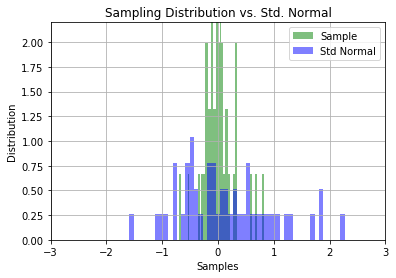

In [4]:
num_samples = 50
samples = sampleData(num_samples)
print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
_ = plt.hist(np.random.randn(num_samples), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
_ = plt.xlim([-3, 3])
_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

Remark- note that sampling distribution was zero-meaned and normed.

## Part 2 Ridge Regression

In [5]:
# Sample a distribution and return the mean and var of the sample
def getSampleParams(n=100):
    beta_hats = []
    for i in range(n):
        X = np.random.randn(51,50)
        beta = np.ones((50,1))
        epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
        y = np.matmul(X, beta) + epsilon
        model = Ridge(alpha=alpha)
        _ = model.fit(X,y)
        beta_hats.extend(model.coef_)
    
    beta_hats = np.array(beta_hats)
    # Beta hat shape is (100,50)
    mean = np.mean(beta_hats[:,0])
    var = np.var(beta_hats[:,0])
    return mean, var

In [6]:
# Get coefficients as lambda varies
alphas = [0.01, 0.1, 1, 10, 100]
means = []
variances = []
for alpha in alphas:
    mean, var = getSampleParams()
    means.append(mean)
    variances.append(var)
    

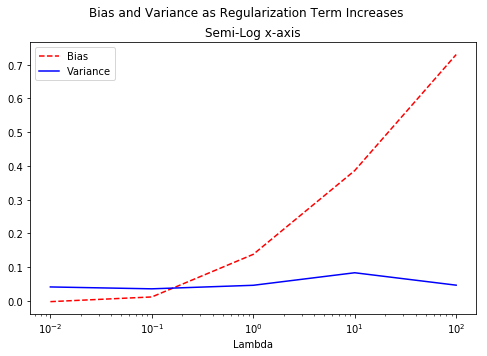

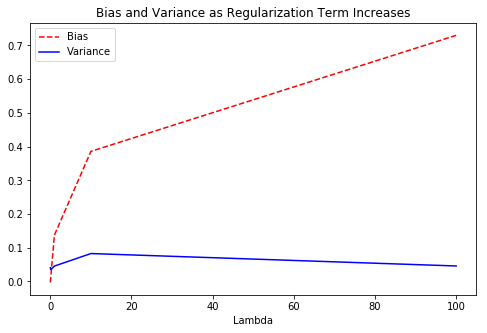

In [7]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.semilogx(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Bias and Variance as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')
_ = plt.legend()

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.plot(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.title('Bias and Variance as Regularization Term Increases')
_ = plt.legend()

Use ridge regression, i.e., L2 regularization. Vary the regularization coeffcient $\lambda = 0.01, 0.1, 1, 10, 100$ and repeat the above experiment. What do you observe? As you increase $\lambda $ is the model becoming more simple or more complex? As you increase $\lambda $ is performance becoming better or worse? Also compute LOOCV for each $\lambda $. How does the value of LOOCV, and in particular how it changes as $\lambda $ varies, compare with what you observe for the explicitly computed variance?

In [8]:
def scoreRidge(X_train, X_test, y_train, y_test, alpha):
    model = Ridge(alpha=alpha)
    _ = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    score = mean_squared_error(y_test, y_hat)
    return score

In [9]:
# Create some data and perform LOOCV
X, y, beta_hat, beta = createData()
loo = LeaveOneOut()
num_splits = loo.get_n_splits(X)

alphas = [0.01, 0.1, 1, 10, 100]
scores = []
for alpha in alphas:
    score = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        score += float(scoreRidge(X_train, X_test, y_train, y_test, alpha))
    scores.append(score/num_splits)
scores = np.array(scores)

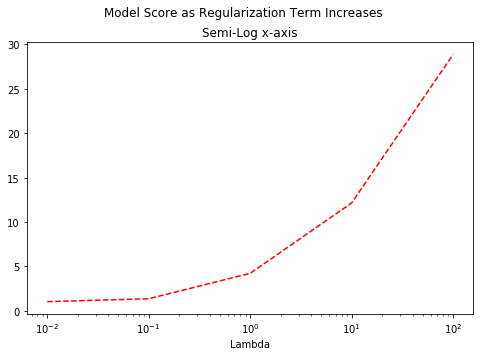

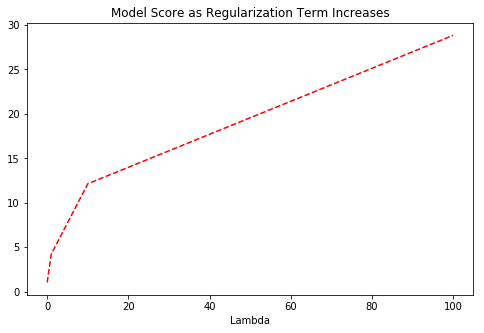

In [10]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Model Score as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.title('Model Score as Regularization Term Increases')

Read about the Bootstrap, and try to use it to compute the variance (as above), but with a single copy of the data, rather than with many fresh copies of the data.

In [31]:
# Sample from data
def grabDataPoint(X,y):
    np.random.seed(42)
    random_index = np.random.randint(0, 50+1)
    #print(X[random_index, :], y[random_index])
    return X[random_index, :], y[random_index]

def buildNewX(X,y):
    X_new = np.empty((51,50), dtype=float)
    y_new = np.empty((51,), dtype=float)
    for i in range(50):
        data_point, label = grabDataPoint(X, y)
        X_new[i, :] = data_point
        y_new[i] = label
    #print(np.linalg.cond(np.matmul(X_new.T, X)))
    return X_new, y_new

'''X = np.random.randn(51,50)
    beta = np.ones((50,1))
    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
    y = np.matmul(X, beta) + epsilon
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta
    return X, y, beta_hat, beta'''

def getBetaHat(X_new, y_new):
    psuedo_inv = inv(np.matmul(X_new.T, X_new))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X_new.T), y_new)
    return beta_hat

def sampleDataBootstrap(X, y, n = 100):
    samples = []
    for i in range(n):
        X_new, y_new = buildNewX(X, y)
        beta_hat = getBetaHat(X_new, y_new)
        samples.append(beta_hat[0])
        if(i == 1):
            plt.figure()
            plt.hist(X)
            plt.figure()
            plt.hist(X_new)
            plt.show()
    samples = np.array(samples)
    return samples

'X = np.random.randn(51,50)\n    beta = np.ones((50,1))\n    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))\n    y = np.matmul(X, beta) + epsilon\n    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))\n    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta\n    return X, y, beta_hat, beta'

Mean of the sampling distribution is: 1388.3647637975657
Variance of the sampling distribution is: 16972018.327448584


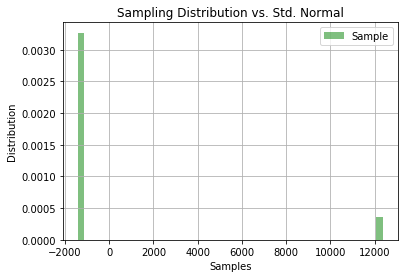

In [33]:
# Create some data and sample from it
X, y, beta_hat, beta = createData()
samples = []
for i in range(10):
    X_new, y_new = buildNewX(X, y)
    beta_hat = getBetaHat(X_new, y_new)
    samples.append(beta_hat.mean())
    #if(i == 1):
    #    plt.figure()
    #    plt.hist(X)
    #    plt.figure()
    #    plt.hist(X_new)
    #    plt.show()
samples = np.array(samples)
#samples = sampleDataBootstrap(X, y)
#X_new y_new = buildNewX(X, y)
#beta_hat = 

print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
#_ = plt.hist(np.random.randn(100), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
#_ = plt.xlim([-3, 3])
#_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)